In [228]:
import glob
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.metrics
import numpy as np
import scipy.stats

In [107]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 8)

In [108]:
countries = pd.read_csv("data/countries.csv")

In [109]:
features = {}
for i in glob.glob("data/*.csv"):
    if not i.endswith("/countries.csv"):
        feature = os.path.splitext(os.path.basename(i))[0]
        features[feature] = pd.read_csv(i).set_index("country")

In [110]:
for f, df in features.items():
    print("Feature {}: year {} to {}".format(f, df.columns[0], df.columns[-1]))

Feature industry_percent_of_gdp: year 1960 to 2017
Feature urban_population_percent_of_total: year 1960 to 2017
Feature ratio_of_girls_to_boys_in_primary_and_secondary_education_perc: year 1970 to 2017
Feature government_health_spending_per_person_international_dollar: year 1995 to 2010
Feature income_per_person_gdppercapita_ppp_inflation_adjusted: year 1800 to 2040
Feature agriculture_percent_of_gdp: year 1960 to 2017
Feature gini: year 1800 to 2040
Feature life_expectancy_female: year 1950 to 2099
Feature life_expectancy_male: year 1950 to 2099
Feature life_expectancy_years: year 1800 to 2018
Feature energy_use_per_person: year 1960 to 2015
Feature high_technology_exports_percent_of_manufactured_exports: year 1988 to 2016
Feature exports_percent_of_gdp: year 1960 to 2017
Feature child_mortality_0_5_year_olds_dying_per_1000_born: year 1800 to 2018
Feature services_percent_of_gdp: year 1960 to 2017


In [111]:
for f, df in features.items():
    features[f] = df.loc[:, "1960":"2015"]

In [112]:
for f, df in features.items():
    print("Feature {}: {} countries".format(f, df.shape[0]))

Feature industry_percent_of_gdp: 189 countries
Feature urban_population_percent_of_total: 194 countries
Feature ratio_of_girls_to_boys_in_primary_and_secondary_education_perc: 190 countries
Feature government_health_spending_per_person_international_dollar: 190 countries
Feature income_per_person_gdppercapita_ppp_inflation_adjusted: 193 countries
Feature agriculture_percent_of_gdp: 189 countries
Feature gini: 195 countries
Feature life_expectancy_female: 184 countries
Feature life_expectancy_male: 184 countries
Feature life_expectancy_years: 187 countries
Feature energy_use_per_person: 169 countries
Feature high_technology_exports_percent_of_manufactured_exports: 175 countries
Feature exports_percent_of_gdp: 185 countries
Feature child_mortality_0_5_year_olds_dying_per_1000_born: 193 countries
Feature services_percent_of_gdp: 171 countries


In [113]:
common_countries = next(iter(features.values())).index
for f, df in list(features.items())[1:]:
    common_countries &= df.index

In [114]:
for f, df in features.items():
    features[f] = df.loc[common_countries, ]

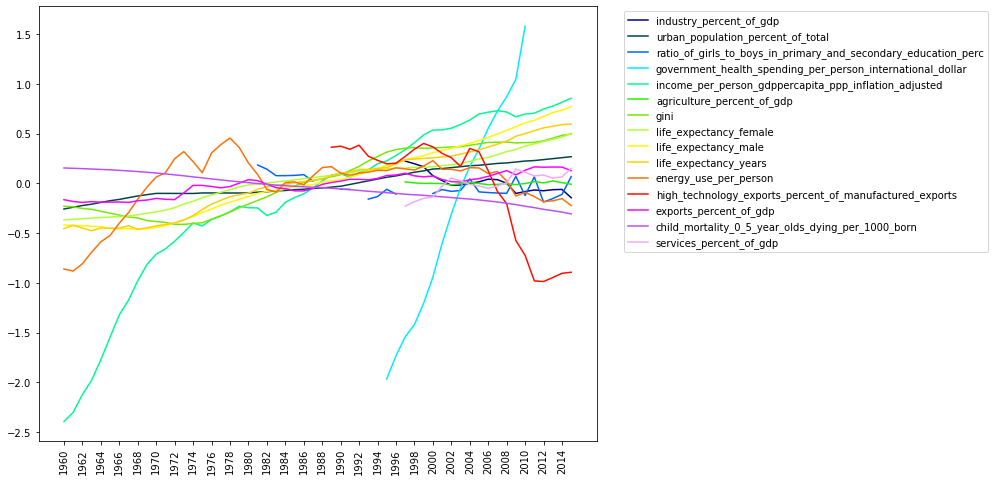

In [115]:
cmap = plt.get_cmap('gist_ncar')
colors = cmap(np.linspace(0, 1, len(features)+1))
for i, (f, df) in enumerate(features.items()):
    df = df.subtract(df.mean(axis=1), axis=0) / df.std(ddof=0)
    plt.plot(df.columns, df.loc["United States", ], c=colors[i], label = f)
plt.xticks(df.columns[::2], rotation="vertical")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

life expectancy

income

gini

exports

In [117]:
def prepare_df_country(country):
    result = pd.DataFrame(index=list(features.values())[0].columns)
    for f, df in features.items():
        result[f] = df.loc[country, ].T
    return result

In [118]:
by_country = {}

In [119]:
for country in list(features.values())[0].index:
    by_country[country] = prepare_df_country(country)

In [129]:
df = by_country["United States"]

In [134]:
years = df.index.values

In [135]:
n = 5

In [173]:
# Indices of time window batches
# [1, 2, 3, 4, 5], [2, 3, 4, 5, 6] …
result = []
for i in range(len(years) - n):
    result += list(range(i, i + n))
result

[0,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 5,
 2,
 3,
 4,
 5,
 6,
 3,
 4,
 5,
 6,
 7,
 4,
 5,
 6,
 7,
 8,
 5,
 6,
 7,
 8,
 9,
 6,
 7,
 8,
 9,
 10,
 7,
 8,
 9,
 10,
 11,
 8,
 9,
 10,
 11,
 12,
 9,
 10,
 11,
 12,
 13,
 10,
 11,
 12,
 13,
 14,
 11,
 12,
 13,
 14,
 15,
 12,
 13,
 14,
 15,
 16,
 13,
 14,
 15,
 16,
 17,
 14,
 15,
 16,
 17,
 18,
 15,
 16,
 17,
 18,
 19,
 16,
 17,
 18,
 19,
 20,
 17,
 18,
 19,
 20,
 21,
 18,
 19,
 20,
 21,
 22,
 19,
 20,
 21,
 22,
 23,
 20,
 21,
 22,
 23,
 24,
 21,
 22,
 23,
 24,
 25,
 22,
 23,
 24,
 25,
 26,
 23,
 24,
 25,
 26,
 27,
 24,
 25,
 26,
 27,
 28,
 25,
 26,
 27,
 28,
 29,
 26,
 27,
 28,
 29,
 30,
 27,
 28,
 29,
 30,
 31,
 28,
 29,
 30,
 31,
 32,
 29,
 30,
 31,
 32,
 33,
 30,
 31,
 32,
 33,
 34,
 31,
 32,
 33,
 34,
 35,
 32,
 33,
 34,
 35,
 36,
 33,
 34,
 35,
 36,
 37,
 34,
 35,
 36,
 37,
 38,
 35,
 36,
 37,
 38,
 39,
 36,
 37,
 38,
 39,
 40,
 37,
 38,
 39,
 40,
 41,
 38,
 39,
 40,
 41,
 42,
 39,
 40,
 41,
 42,
 43,
 40,
 41,
 42,
 43,
 44,
 41,
 42,
 43,


In [212]:
z = df.iloc[result, ].loc[:, df.isna().sum(axis=0) == 0]
z = z.drop(columns="gini")

In [213]:
z["year_num"] = np.tile(list(range(n)), len(years) - n)
z["batch"] = np.repeat(list(range(len(years) - n)), n)

In [214]:
z = z.reset_index()
z = z.drop(columns="index")
z = z.pivot(index="batch", columns="year_num")

In [215]:
z.columns = ["_".join(map(str, i)) for i in z.columns]

In [216]:
X = z

In [217]:
y = df.loc[:,"gini"].iloc[range(n, df.shape[0])]

In [218]:
y.shape

(51,)

In [219]:
X.shape

(51, 40)

In [220]:
X_train, X_test = X.iloc[:-10,], X.iloc[-10:,]
y_train, y_test = y[:-10], y[-10:]

In [240]:
cls = sklearn.linear_model.LinearRegression()

In [241]:
cls.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [242]:
sklearn.metrics.mean_squared_error(y_train, cls.predict(X_train))

4.745014753211215e-22

In [243]:
sklearn.metrics.mean_squared_error(y_test, cls.predict(X_test))

899.42408904063

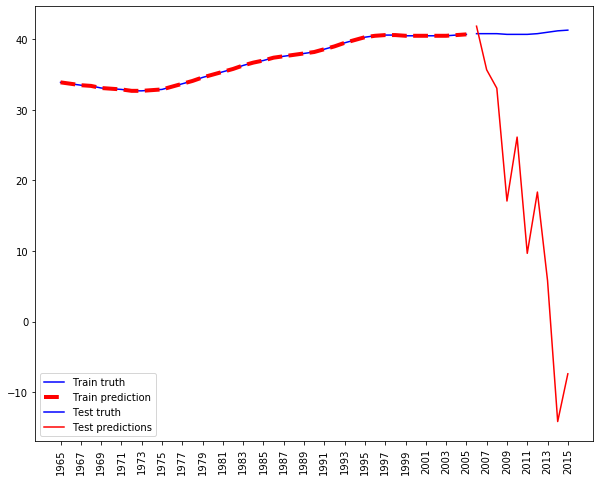

In [257]:
plt.plot(y_train.index, y_train, 'blue', label="Train truth")
plt.plot(y_train.index, cls.predict(X_train), 'r--', linewidth=4, label="Train prediction")
plt.plot(y_test.index, y_test, 'blue', label="Test truth")
plt.plot(y_test.index, cls.predict(X_test), 'r', label="Test predictions")
plt.xticks(y.index[::2], rotation="vertical")
plt.legend(loc="lower left")

In [258]:
cls2 = sklearn.linear_model.Ridge()

In [259]:
cls2.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [261]:
sklearn.metrics.mean_squared_error(y_train, cls2.predict(X_train))

0.009296314362544043

In [262]:
sklearn.metrics.mean_squared_error(y_test, cls2.predict(X_test))

11.89167254374242

(0, 47.01254883139271)

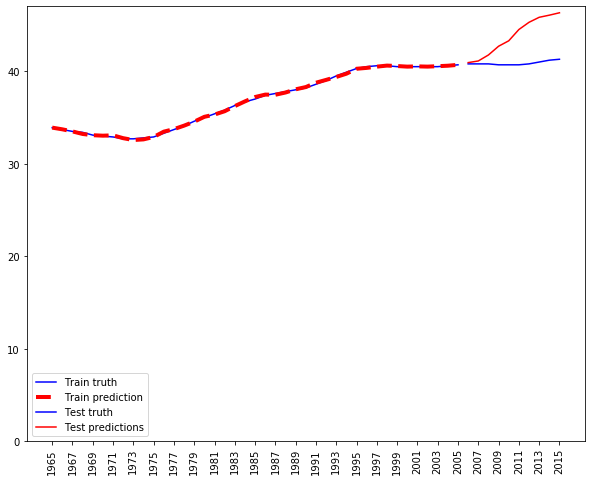

In [264]:
plt.plot(y_train.index, y_train, 'blue', label="Train truth")
plt.plot(y_train.index, cls2.predict(X_train), 'r--', linewidth=4, label="Train prediction")
plt.plot(y_test.index, y_test, 'blue', label="Test truth")
plt.plot(y_test.index, cls2.predict(X_test), 'r', label="Test predictions")
plt.xticks(y.index[::2], rotation="vertical")
plt.legend(loc="lower left")
plt.ylim(0)